### This script contains the following:
#### 1. Importing Visualization Libraries
#### 2. Importing Data
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 4. Exporting Data
#### 5. Answering Project Quesitons

#### 1. Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

#### Importing Data

In [29]:
# Project folder path

path=r'/Users/sukihabibe/Desktop/CareerFoundry/Portofolio_A6/World_Happiness_Report'

In [30]:
# Importing data

dfall=pd.read_csv(os.path.join(path, '02_Data', 'Prepared', 'df_all.csv'))

In [31]:
dfall.shape

(782, 12)

In [32]:
dfall.columns

Index(['Unnamed: 0', 'Year', 'Country', 'Region', 'Overall rank',
       'Happiness score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [33]:
# Drop 'Unnamed:0'

dfall=dfall.drop("Unnamed: 0",axis=1)

#### Correlation:
    Coefficients range between -1, 0, and 1, with -1 being a perfect negative relationship, 0 indicating no relationship, and 1 being a perfect positive relationship. On a scale, it would look like this:
    
        0: no relationship
        0.1–0.3: weak relationship
        0.3–0.5: moderate relationship
        0.5–1.0: strong relationship

In [34]:
# Create df excluding 'Year'for correlation analysis

dfsub=dfall[['Country', 'Region',
       'Happiness score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

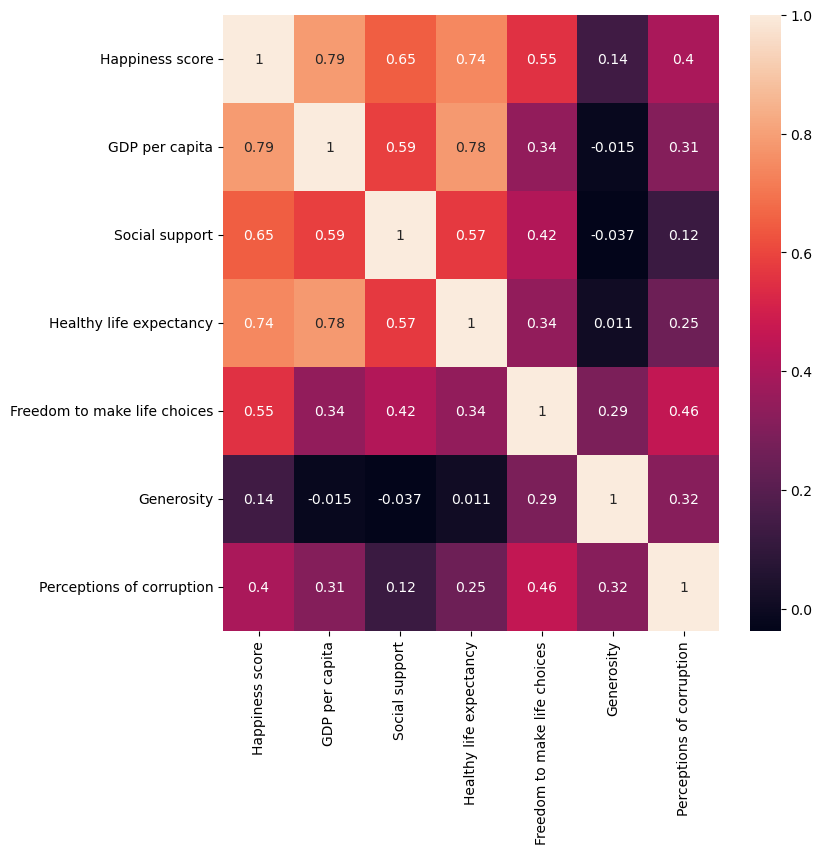

In [35]:
# Create a correlation heatmap using matplotlib

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots de-
#-fined above.
corr = sns.heatmap(dfsub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### Factors influencing the Happiness score the most are:
    GDP per capits, 
    Healthy life expectancy, 
    Social support, 
    Freedom to make life choices

#### Scatterplots

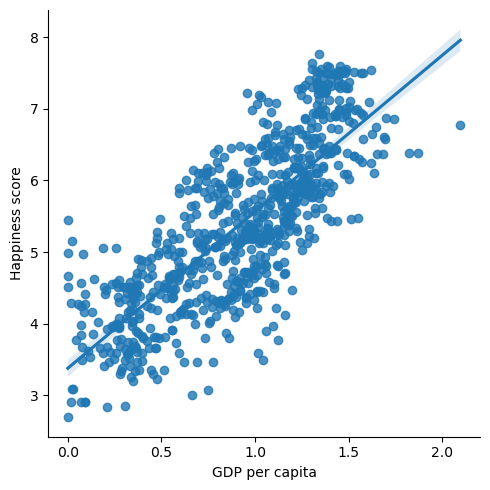

In [36]:
# Positive Strong Correlation +0.74

sns.lmplot(x = 'GDP per capita', y = 'Happiness score', data = dfall) 

## The non-linearity indicates a lot of variance in the data. 

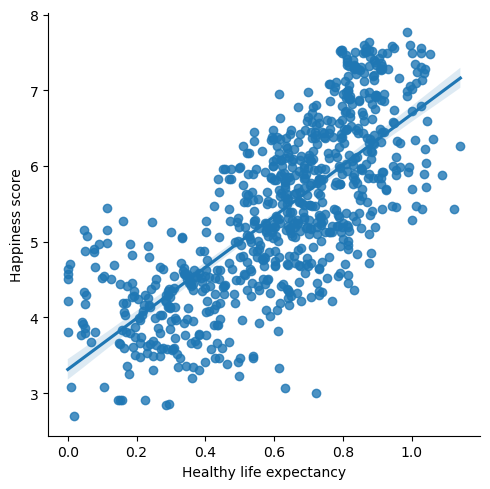

In [37]:
# Positive Strong Correlation +0.79

sns.lmplot(x = 'Healthy life expectancy', y = 'Happiness score', data = dfall) 

## The non-linearity indicates a lot of variance in the data. 

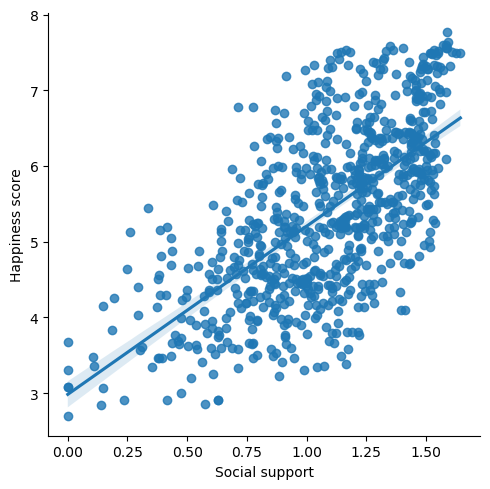

In [38]:
# Positive Strong Correlation +0.79

sns.lmplot(x = 'Social support', y = 'Happiness score', data = dfall) 

## The non-linearity indicates a lot of variance in the data. 

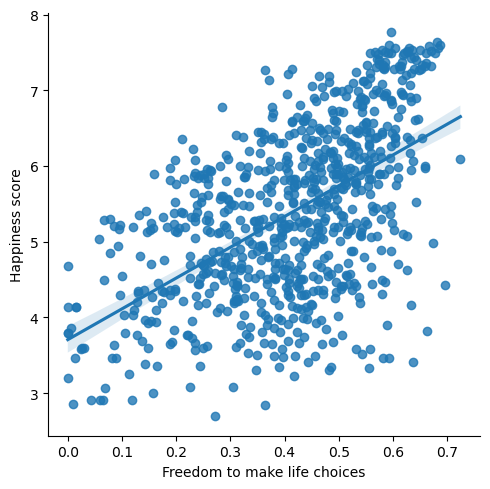

In [39]:
# Positive Strong Correlation +0.55

sns.lmplot(x = 'Freedom to make life choices', y = 'Happiness score', data = dfall) 

## This non-linearity correlation shows an even bigger variance. Interpretation: 

In [40]:
# Create new df for only the 6 factors for pair plot

dfsub2=dfall[['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

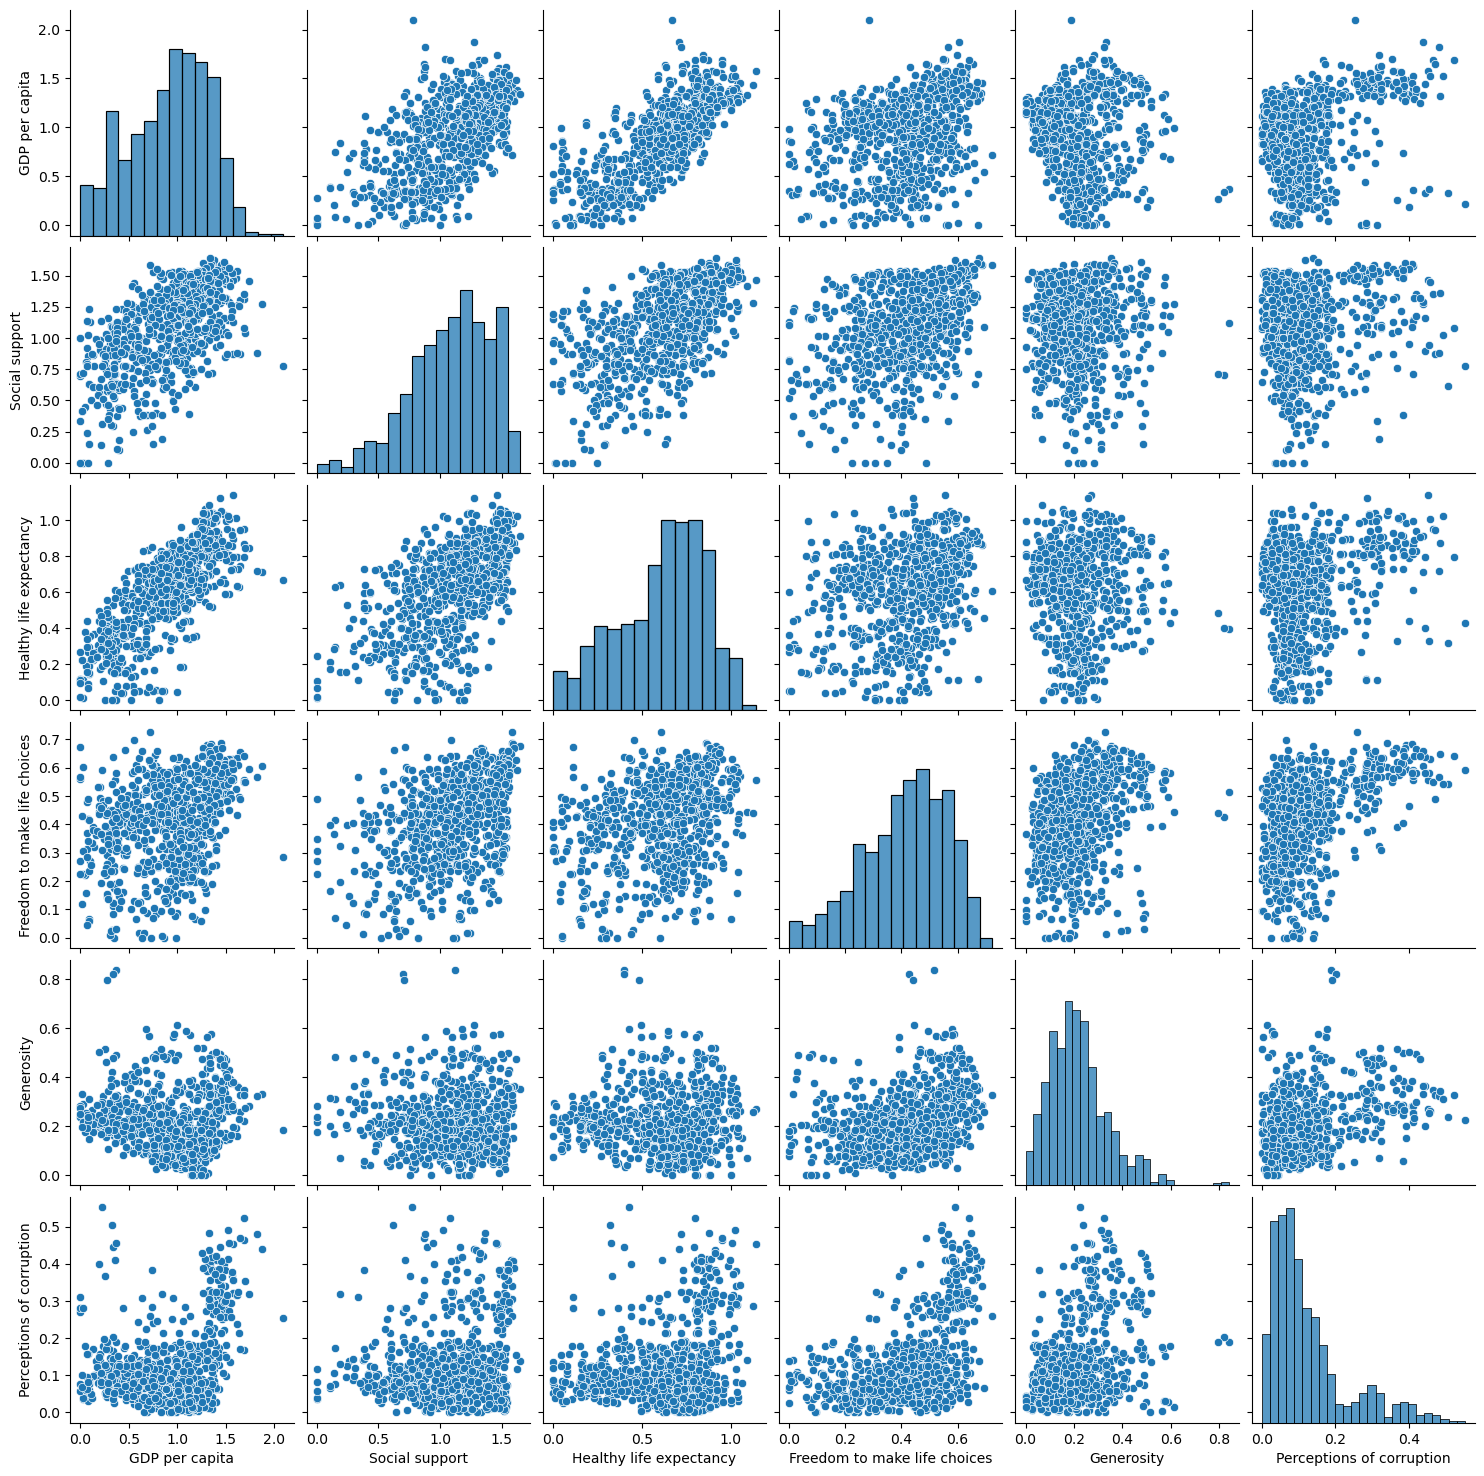

In [41]:
# Create a pair plot 

g = sns.pairplot(dfsub2)

#### Relationships of interest:

#### Perception of corruption has a low influence on happines in most countries, however, where its influence is above a certain point, a positive correlation becomes apparent with Freedom and GDP. This is likely the case in countries with low GDP and high Corruption. Generosity also shows a correlation with this factor probably due to lack of trust in charities because of percieved corruption. 
    # Perception of corruption  &  Freedom to make life choices: when over 0.2 a positive correlation with Freedom       appears.
    # Perception of corruption  &  GDP per capita: when over 0.2 a positive correlation with GDP appears.
    # Perception of corruption  &  Generosity: when over 0.2 a positive correlation with Generosity appears, 
       although not so clearcut as with the previous 2 factors.


#### These three factors show a quite strong positive correlation. It is likely that the high regards for these factors are to be found in the more developed countries. As education level is higher, the knowledge and importance for these 3 factors go hand in hand. 
    # Healthy life expectancy 
    # GDP per capita            : Whenever one of these 3 factors go up, so does the other 2. 
    # Social support

#### Create a Categorical Plot

<AxesSubplot:xlabel='Happiness score', ylabel='Count'>

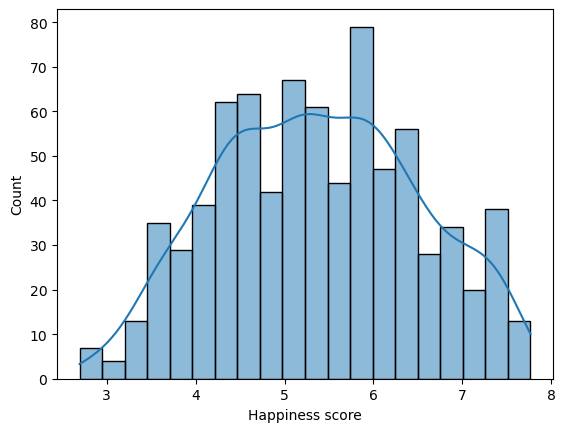

In [42]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the happiness score ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(dfall['Happiness score'], bins = 20, kde = True)

In [43]:
# Derive new column 'Happiness-range'

dfall.loc[dfall['Happiness score'] < 4.5, 'Happiness-range'] = 'Low score'

In [44]:
dfall.loc[(dfall['Happiness score'] >= 4.5) & (dfall['Happiness score'] < 6.5), 'Happiness-range'] = 'Middle score'

In [45]:
dfall.loc[dfall['Happiness score'] >= 6.5, 'Happiness-range'] = 'High score'

In [46]:
dfall.head()

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High score
1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High score
2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High score
3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High score
4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High score


In [47]:
dfall['Happiness-range'].value_counts(dropna=False)

Middle score    457
Low score       192
High score      133
Name: Happiness-range, dtype: int64

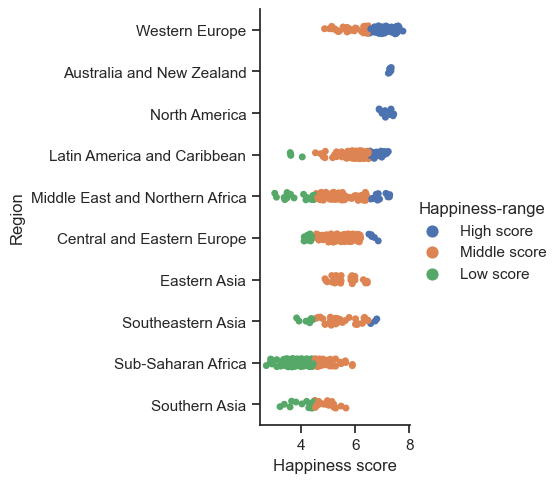

In [48]:
# Create a categorical plot "Hapiness-range" & "Region"

sns.set(style='ticks')
g = sns.catplot(x='Happiness score', y='Region', hue='Happiness-range', data=dfall)

## The low scores does not appear in the Western world. Low score are prevelant in the East with very few high scores. 

### 4. Exporting Data

In [49]:
# Export updated dfall
dfall.to_csv(os.path.join(path, '02_Data','Prepared','df_all2.csv'))

### 5. Answering Project Questions

##### 2. Is the GDP positively correlated to happiness?	
       GDP per capita has the highest correlation with the Happiness score.
##### 3. What are other factors that shows correlation with the happiness the most?
       Factors showing the highest correlations are:
       - GDP per capita, 
       - Healthy life expectancy, 
       - Social support, 
       - Freedom to make life choices.
##### 4. What are the factors showing no correlation to the happiness scores?
       - Generosity shows the least correlation.
##### 5. Are there any correlations between factors?	
       # Perception of corruption  &  Freedom t.m.l.c.    Whenever Corruption exceeds plus/minus 0.2, 
       # Perception of corruption  &  GDP per capita  --> a positive correlation appears with these 3 factors.
       # Perception of corruption  &  Generosity          Before that point none or little correlation. 
          
       # Healthy life expectancy  &  GDP p. capita   -->  Whenever one of these factor increase, so does the  
                           &  Social support              others.


### Hypotheses: 
    - As GDP per capita is higher, country's have a higher happiness score.
    - When Perception of corruption is below 0.20, it has little correlation with happiness score. 